# Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [6]:
# while the Numpy Array has an implicitly defined integer index used to access the values,
# the Pandas Series has an explicitly defined index associated with the values.
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

In [8]:
data['b']

0.5

In [9]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [10]:
population['California']

38332521

In [11]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [13]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [14]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [15]:
states.columns

Index(['population', 'area'], dtype='object')

In [16]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [17]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [18]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [19]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

In [20]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [21]:
'a' in data

True

In [22]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [23]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [34]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [36]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [38]:
# the loc attribute allows indexing and slicing that always references the explicit index
data.loc[1:3]

1    a
3    b
dtype: object

In [40]:
# The iloc attribute allows indexing and slicing that always references the implicit Python-style index
data.iloc[1:3]

3    b
5    c
dtype: object

In [94]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [95]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [96]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [97]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


Detecting null values

In [98]:
data = pd.Series([1, np.nan, 'hello', None])

In [99]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Dropping null values

In [100]:
data.dropna()

0        1
2    hello
dtype: object

In [101]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

Filling null values

In [102]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [103]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [104]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

One-to-one joins

In [105]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [106]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [107]:
df3.head(2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012


In [108]:
df3.tail(2)

,employee,group,hire_date
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [109]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [118]:
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [114]:
#Read csv file
births = pd.read_csv('birth.csv')

In [115]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


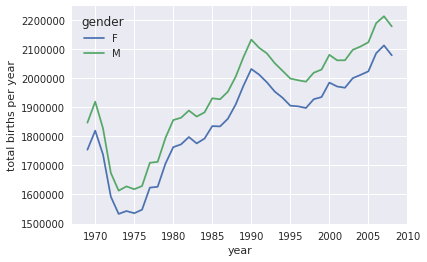

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');